# Image preprocessing techniques

In [ ]:
import cv2

## 1. converting image into tensors

In [ ]:
import tensorflow as tf
img = tf.io.read_file("/content/img3.jpg")
img_tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
img_tensor = tf.image.resize(img_tensor, [224, 224])
input_tensor = tf.expand_dims(img_tensor, axis=0)
input_tensor

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.9840822 , 0.9840822 , 0.9840822 ],
         ...,
         [0.96270084, 0.96270084, 0.96270084],
         [0.967936  , 0.967936  , 0.967936  ],
         [0.98060906, 0.98060906, 0.98060906]],

        [[0.96615136, 0.96615136, 0.96615136],
         [0.8637639 , 0.8637639 , 0.8637639 ],
         [0.79471296, 0.79471296, 0.79471296],
         ...,
         [0.9032744 , 0.9032744 , 0.9032744 ],
         [0.9186061 , 0.9186061 , 0.9186061 ],
         [0.9343905 , 0.9343905 , 0.9343905 ]],

        [[0.6992162 , 0.6992162 , 0.6992162 ],
         [0.49361   , 0.49361   , 0.49361   ],
         [0.37877285, 0.37877285, 0.37877285],
         ...,
         [0.8406076 , 0.8406076 , 0.8406076 ],
         [0.8428133 , 0.8428133 , 0.8428133 ],
         [0.894519  , 0.894519  , 0.894519  ]],

        ...,

        [[0.6467962 , 0.6467962 , 

## 2. Linear filtering

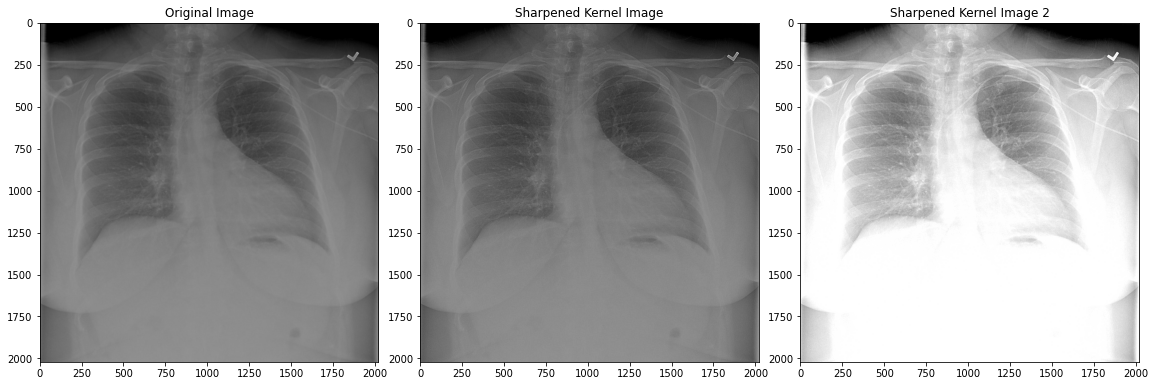

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("/content/img2.jpg")

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

# To conovolve the kernel on an image we can use cv.filter2D
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

kernel_sharpening_2 = np.array([[-1, -1, -1],
                             [-1, 10, -1],
                             [-1, -1, -1]])

sharpened = cv.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
ax[1].set_title('Sharpened Kernel Image')

sharpened_2 = cv.filter2D(image, -1, kernel_sharpening_2)
ax[2].imshow(cv.cvtColor(sharpened_2, cv.COLOR_BGR2RGB))
ax[2].set_title('Sharpened Kernel Image 2')

plt.show()

## 3.ICA(Independent Component Analysis)

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

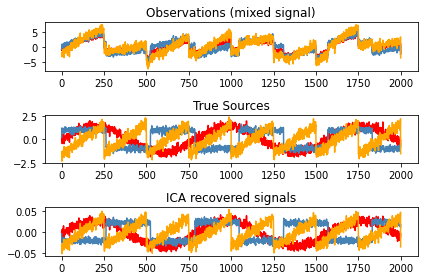

In [ ]:
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  
s2 = np.sign(np.sin(3 * time)) 
s3 = signal.sawtooth(2 * np.pi * time) 

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape) 

S /= S.std(axis=0) 
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]) 
X = np.dot(S, A.T) 


ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
A_ = ica.mixing_  

plt.figure()

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()